In [4]:
import numpy as np
import imutils
import cv2
import os
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rc('image',cmap='gray',interpolation='bicubic')

In [3]:
from keras.preprocessing import image

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/usr/local/lib/python2.7/dist-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p
Using TensorFlow backend.
/home/umer/.local/lib/python2.7/site-packages/scipy/sparse/lil.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/home/umer/.local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:165: RuntimeWarning: numpy.dty

In [5]:
path_1 = './../data/Images/New_Files/New_Files/'
path_2 = './../data/Masks/New_Masks/New_Masks/'
#new_path = './../augmented_data/images'

In [6]:
img_file = glob.glob(path_1+'*.jpg')
out_file = glob.glob(path_2+"*.jpg")
print(len(img_file),len(out_file))

(2448, 2448)


In [7]:
x = np.zeros((2448,1024,1024),dtype=np.float32)
y = np.zeros((2448,1024,1024),dtype=np.float32)

In [9]:
for i in range(x.shape[0]):
    img = imread(img_file[i])
    out = imread(out_file[i])
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_out = cv2.cvtColor(out,cv2.COLOR_BGR2GRAY)
    gray_out = gray_out/255.0
    gray_out[gray_out<0.5]=0
    gray_out[gray_out>=0.5]=1
    x[i]=gray_img
    y[i]=gray_out

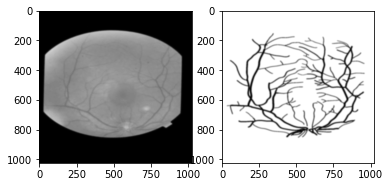

In [10]:
subplot(121)
imshow(x[0])
subplot(122)
imshow(y[0])

In [11]:
x.shape

(2448, 1024, 1024)

In [12]:
# np.save('X_train-100-orig-1024.npy',x)
# np.save('Y_train-100-orig-1024.npy',y)

In [11]:
X_train = np.load('X_train-100-orig-1024.npy')
Y_train = np.load('Y_train-100-orig-1024.npy')

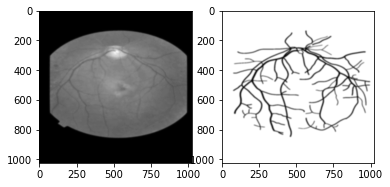

In [14]:
idx = np.random.randint(0,X_train.shape[0])
subplot(121)
imshow(X_train[idx])
subplot(122)
imshow(Y_train[idx])

In [8]:
from model import *
import numpy as np
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# from keras import backend as K
# K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=8, inter_op_parallelism_threads=8)))

/home/umer/.local/lib/python2.7/site-packages/scipy/signal/_max_len_seq.py:8: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._max_len_seq_inner import _max_len_seq_inner
/home/umer/.local/lib/python2.7/site-packages/scipy/signal/_upfirdn.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._upfirdn_apply import _output_len, _apply
/home/umer/.local/lib/python2.7/site-packages/scipy/optimize/_trlib/__init__.py:1: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._trlib import TRLIBQuadraticSubproblem
/home/umer/.local/lib/python2.7/site-packages/scipy/optimize/_numdiff.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._group_columns import group_dense, group_sparse
/home/umer/.local/lib/python2.7/site-packages/scipy/signal/spectral.py:10: RuntimeWar

In [9]:
model = unet()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1024, 1024, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 1024, 1024, 6 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 1024, 1024, 6 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 512, 512, 64) 0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

model.py:66: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  model = Model(input = inputs, output = conv10)


In [17]:
# X_train=np.load('./X_train-100-orig-1024.npy')
# Y_train = np.load('./Y_train-100-orig-1024.npy')

In [13]:
X_train.shape

(2448, 1024, 1024)

In [14]:
print X_train.shape,Y_train.shape

(2448, 1024, 1024) (2448, 1024, 1024)


In [15]:
X_train = X_train.reshape(X_train.shape+(1,))
Y_train = Y_train.reshape(Y_train.shape+(1,))

In [16]:
print X_train.shape,Y_train.shape

(2448, 1024, 1024, 1) (2448, 1024, 1024, 1)


In [17]:
np.unique(Y_train[0])

array([0., 1.], dtype=float32)

In [18]:
X_train = (X_train/255.0)-0.5

Populating the interactive namespace from numpy and matplotlib
(1024, 1024, 1)


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['maximum', 'minimum', 'copy', 'multiply', 'average', 'dot', 'get', 'concatenate', 'add', 'subtract']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


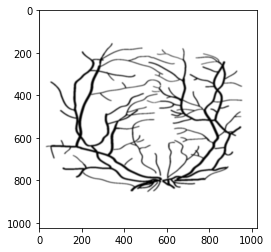

In [19]:
%pylab inline
imshow(Y_train[0][:,:,0],cmap = 'gray')
print(X_train[0].shape)

In [20]:
np.array(X_train.shape)

array([2448, 1024, 1024,    1])

In [26]:
(2448*1024*1024*4)/1024.0/1024.0/1024.0

9.5625

In [ ]:
model.fit(X_train,Y_train,batch_size=2,epochs=10,validation_split=0.1,class_weight = [0.8,0.2])

Train on 2203 samples, validate on 245 samples
Epoch 1/10
2203/2203 [==============================] - 1013s 460ms/step - loss: 0.1651 - acc: 0.9396 - val_loss: 0.1358 - val_acc: 0.9534
Epoch 2/10
2203/2203 [==============================] - 1009s 458ms/step - loss: 0.1218 - acc: 0.9558 - val_loss: 0.1100 - val_acc: 0.9570
Epoch 3/10
2203/2203 [==============================] - 1008s 457ms/step - loss: 0.1070 - acc: 0.9581 - val_loss: 0.1045 - val_acc: 0.9590
Epoch 4/10
2203/2203 [==============================] - 1006s 457ms/step - loss: 0.1034 - acc: 0.9592 - val_loss: 0.1058 - val_acc: 0.9587
Epoch 5/10
2203/2203 [==============================] - 1005s 456ms/step - loss: 0.1010 - acc: 0.9599 - val_loss: 0.1013 - val_acc: 0.9598
Epoch 6/10
2203/2203 [==============================] - 1006s 457ms/step - loss: 0.0987 - acc: 0.9605 - val_loss: 0.1003 - val_acc: 0.9600
Epoch 7/10
2203/2203 [==============================] - 1005s 456ms/step - loss: 0.0962 - acc: 0.9612 - val_loss: 0.097

In [28]:
model.save('./final_model_original_augmented_Iteration_2.h5')

In [15]:
from keras.models import load_model
model = load_model('./final_model_original_augmented_Iteration_2.h5')

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/usr/local/lib/python2.7/dist-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p
Using TensorFlow backend.
/home/umer/.local/lib/python2.7/site-packages/scipy/sparse/lil.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/home/umer/.local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:165: RuntimeWarning: numpy.dty

Populating the interactive namespace from numpy and matplotlib
52


False

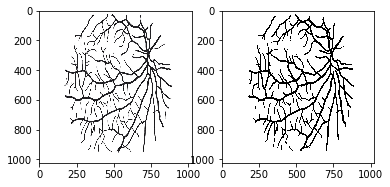

In [13]:
# import cv2
# import os
# from PIL import Image
# %pylab inline
# path = './../data/Test/Test_Images/'
# files = os.listdir(path)
# b=1
# a = 0
# print(len(files))
# #for i in files:
# image = cv2.imread('./../data/Test/Test_labels/0_label.jpg')
# gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# gray_img = (gray_img / 255.0)-0.5
# reshaped_img = gray_img.reshape((1,)+gray_img.shape+(1,))
# o = model.predict(reshaped_img)
# o[o<=0.5]=0
# o[o>0.5]=1
# subplot(121)
# imshow(image)
# subplot(122)
# imshow(o[0,:,:,0],cmap = 'gray')
# cv2.imwrite(os.path.join('{}_predicted.jpg'.format(a)), o)
# #a = a+1

In [6]:
img_path_1 = './../data/Test/Test_Images/01_test.tif'
img_path_2 = './../data/Test/Test_Images/02_test.tif'
img_path_3 = './../data/Test/Test_Images/03_test.tif'
img_path_4 = './../data/Test/Test_Images/04_test.tif'
img_path_5 = './../data/Test/Test_Images/05_test.tif'
img_path_6 = './../data/Test/Test_Images/06_test.tif'
img_path_7 = './../data/Test/Test_Images/07_test.tif'
img_path_8 = './../data/Test/Test_Images/08_test.tif'
img_path_9 = './../data/Test/Test_Images/09_test.tif'
img_path_10 = './../data/Test/Test_Images/10_test.tif'
img_path_11 = './../data/Test/Test_Images/11_test.tif'
img_path_12 = './../data/Test/Test_Images/12_test.tif'
img_path_13 = './../data/Test/Test_Images/13_test.tif'
img_path_14 = './../data/Test/Test_Images/14_test.tif'
img_path_15 = './../data/Test/Test_Images/15_test.tif'
img_path_16 = './../data/Test/Test_Images/16_test.tif'
img_path_17 = './../data/Test/Test_Images/17_test.tif'
img_path_18 = './../data/Test/Test_Images/18_test.tif'
img_path_19 = './../data/Test/Test_Images/19_test.tif'
img_path_20 = './../data/Test/Test_Images/20_test.tif'
# out_path_1 = './../data/Test/Test_labels/0_label.jpg'
# out_path_2 = './../data/Test/Test_labels/1_label.jpg'
# out_path_3 = './../data/Test/Test_labels/2_label.jpg'
# out_path_4 = './../data/Test/Test_labels/3_label.jpg'
# out_path_5 = './../data/Test/Test_labels/4_label.jpg'
# out_path_6 = './../data/Test/Test_labels/5_label.jpg'
# out_path_7 = './../data/Test/Test_labels/6_label.jpg'
# out_path_8 = './../data/Test/Test_labels/7_label.jpg'
# out_path_9 = './../data/Test/Test_labels/8_label.jpg'
# out_path_10 = './../data/Test/Test_labels/9_label.jpg'
# out_path_11 = './../data/Test/Test_labels/10_label.jpg'
# out_path_12 = './../data/Test/Test_labels/11_label.jpg'
# out_path_13 = './../data/Test/Test_labels/12_label.jpg'
# out_path_14 = './../data/Test/Test_labels/13_label.jpg'
# out_path_15 = './../data/Test/Test_labels/14_label.jpg'
# out_path_16 = './../data/Test/Test_labels/15_label.jpg'
# out_path_17 = './../data/Test/Test_labels/16_label.jpg'
# out_path_18 = './../data/Test/Test_labels/17_label.jpg'
# out_path_19 = './../data/Test/Test_labels/18_label.jpg'
# out_path_20 = './../data/Test/Test_labels/19_label.jpg'

In [7]:
import cv2
img_1 = imread(img_path_1)
img_2 = imread(img_path_2)
img_3 = imread(img_path_3)
img_4 = imread(img_path_4)
img_5 = imread(img_path_5)
img_6 = imread(img_path_6)
img_7 = imread(img_path_7)
img_8 = imread(img_path_8)
img_9 = imread(img_path_9)
img_10 = imread(img_path_10)
img_11 = imread(img_path_11)
img_12 = imread(img_path_12)
img_13 = imread(img_path_13)
img_14 = imread(img_path_14)
img_15 = imread(img_path_15)
img_16 = imread(img_path_16)
img_17 = imread(img_path_17)
img_18 = imread(img_path_18)
img_19 = imread(img_path_19)
img_20 = imread(img_path_20)
# out_1 = imread(out_path_1)
# out_2 = imread(out_path_2)
# out_3 = imread(out_path_3)
# out_4 = imread(out_path_4)
# out_5 = imread(out_path_5)
# out_6 = imread(out_path_6)
# out_7 = imread(out_path_7)
# out_8 = imread(out_path_8)
# out_9 = imread(out_path_9)
# out_10 = imread(out_path_10)
# out_11 = imread(out_path_11)
# out_12 = imread(out_path_12)
# out_13 = imread(out_path_13)
# out_14 = imread(out_path_14)
# out_15 = imread(out_path_15)
# out_16 = imread(out_path_16)
# out_17 = imread(out_path_17)
# out_18 = imread(out_path_18)
# out_19 = imread(out_path_19)
# out_20 = imread(out_path_20)

In [8]:
import cv2
 
# img = cv2.imread('/home/img/python.png', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img_1.shape)
 
width = 1024
height = 1024
dim = (width, height)
 
# resize image
img_1 = cv2.resize(img_1, dim, interpolation = cv2.INTER_AREA)
img_2 = cv2.resize(img_2, dim, interpolation = cv2.INTER_AREA)
img_3 = cv2.resize(img_3, dim, interpolation = cv2.INTER_AREA)
img_4 = cv2.resize(img_4, dim, interpolation = cv2.INTER_AREA)
img_5 = cv2.resize(img_5, dim, interpolation = cv2.INTER_AREA)
img_6 = cv2.resize(img_6, dim, interpolation = cv2.INTER_AREA)
img_7 = cv2.resize(img_7, dim, interpolation = cv2.INTER_AREA)
img_8 = cv2.resize(img_8, dim, interpolation = cv2.INTER_AREA)
img_9 = cv2.resize(img_9, dim, interpolation = cv2.INTER_AREA)
img_10 = cv2.resize(img_10, dim, interpolation = cv2.INTER_AREA)
img_11= cv2.resize(img_11, dim, interpolation = cv2.INTER_AREA)
img_12= cv2.resize(img_12, dim, interpolation = cv2.INTER_AREA)
img_13= cv2.resize(img_13, dim, interpolation = cv2.INTER_AREA)
img_14 = cv2.resize(img_14, dim, interpolation = cv2.INTER_AREA)
img_15 = cv2.resize(img_15, dim, interpolation = cv2.INTER_AREA)
img_16 = cv2.resize(img_16, dim, interpolation = cv2.INTER_AREA)
img_17 = cv2.resize(img_17, dim, interpolation = cv2.INTER_AREA)
img_18 = cv2.resize(img_18, dim, interpolation = cv2.INTER_AREA)
img_19 = cv2.resize(img_19, dim, interpolation = cv2.INTER_AREA)
img_20 = cv2.resize(img_20, dim, interpolation = cv2.INTER_AREA)

 
print('Resized Dimensions : ',img_1.shape)
print('Resized Dimensions : ',img_2.shape)
print('Resized Dimensions : ',img_3.shape)
print('Resized Dimensions : ',img_4.shape)
print('Resized Dimensions : ',img_5.shape)
print('Resized Dimensions : ',img_6.shape)
print('Resized Dimensions : ',img_7.shape)
print('Resized Dimensions : ',img_8.shape)
print('Resized Dimensions : ',img_9.shape)
print('Resized Dimensions : ',img_10.shape)
print('Resized Dimensions : ',img_11.shape)
print('Resized Dimensions : ',img_12.shape)
print('Resized Dimensions : ',img_13.shape)
print('Resized Dimensions : ',img_14.shape)
print('Resized Dimensions : ',img_15.shape)
print('Resized Dimensions : ',img_16.shape)
print('Resized Dimensions : ',img_17.shape)
print('Resized Dimensions : ',img_18.shape)
print('Resized Dimensions : ',img_19.shape)
print('Resized Dimensions : ',img_20.shape)

 

('Original Dimensions : ', (584, 565, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))


In [ ]:
subplot(121)
imshow(img_1)
subplot(122)
imshow(out_1)

In [11]:
gray_img_1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
gray_img_2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
gray_img_3 = cv2.cvtColor(img_3,cv2.COLOR_BGR2GRAY)
gray_img_4 = cv2.cvtColor(img_4,cv2.COLOR_BGR2GRAY)
gray_img_5 = cv2.cvtColor(img_5,cv2.COLOR_BGR2GRAY)
gray_img_6 = cv2.cvtColor(img_6,cv2.COLOR_BGR2GRAY)
gray_img_7 = cv2.cvtColor(img_7,cv2.COLOR_BGR2GRAY)
gray_img_8 = cv2.cvtColor(img_8,cv2.COLOR_BGR2GRAY)
gray_img_9 = cv2.cvtColor(img_9,cv2.COLOR_BGR2GRAY)
gray_img_10 = cv2.cvtColor(img_10,cv2.COLOR_BGR2GRAY)
gray_img_11 = cv2.cvtColor(img_11,cv2.COLOR_BGR2GRAY)
gray_img_12 = cv2.cvtColor(img_12,cv2.COLOR_BGR2GRAY)
gray_img_13 = cv2.cvtColor(img_13,cv2.COLOR_BGR2GRAY)
gray_img_14 = cv2.cvtColor(img_14,cv2.COLOR_BGR2GRAY)
gray_img_15 = cv2.cvtColor(img_15,cv2.COLOR_BGR2GRAY)
gray_img_16 = cv2.cvtColor(img_16,cv2.COLOR_BGR2GRAY)
gray_img_17 = cv2.cvtColor(img_17,cv2.COLOR_BGR2GRAY)
gray_img_18 = cv2.cvtColor(img_18,cv2.COLOR_BGR2GRAY)
gray_img_19 = cv2.cvtColor(img_19,cv2.COLOR_BGR2GRAY)
gray_img_20 = cv2.cvtColor(img_20,cv2.COLOR_BGR2GRAY)
# gray_out_1 = cv2.cvtColor(out_1,cv2.COLOR_BGR2GRAY)
# gray_out_2 = cv2.cvtColor(out_2,cv2.COLOR_BGR2GRAY)
# gray_out_3 = cv2.cvtColor(out_3,cv2.COLOR_BGR2GRAY)
# gray_out_4 = cv2.cvtColor(out_4,cv2.COLOR_BGR2GRAY)
# gray_out_5 = cv2.cvtColor(out_5,cv2.COLOR_BGR2GRAY)
# gray_out_6 = cv2.cvtColor(out_6,cv2.COLOR_BGR2GRAY)
# gray_out_7 = cv2.cvtColor(out_7,cv2.COLOR_BGR2GRAY)
# gray_out_8 = cv2.cvtColor(out_8,cv2.COLOR_BGR2GRAY)
# gray_out_9 = cv2.cvtColor(out_9,cv2.COLOR_BGR2GRAY)
# gray_out_10 = cv2.cvtColor(out_10,cv2.COLOR_BGR2GRAY)
# gray_out_11 = cv2.cvtColor(out_11,cv2.COLOR_BGR2GRAY)
# gray_out_12 = cv2.cvtColor(out_12,cv2.COLOR_BGR2GRAY)
# gray_out_13 = cv2.cvtColor(out_13,cv2.COLOR_BGR2GRAY)
# gray_out_14 = cv2.cvtColor(out_14,cv2.COLOR_BGR2GRAY)
# gray_out_15 = cv2.cvtColor(out_15,cv2.COLOR_BGR2GRAY)
# gray_out_16 = cv2.cvtColor(out_16,cv2.COLOR_BGR2GRAY)
# gray_out_17 = cv2.cvtColor(out_17,cv2.COLOR_BGR2GRAY)
# gray_out_18 = cv2.cvtColor(out_18,cv2.COLOR_BGR2GRAY)
# gray_out_19 = cv2.cvtColor(out_19,cv2.COLOR_BGR2GRAY)
# gray_out_20 = cv2.cvtColor(out_20,cv2.COLOR_BGR2GRAY)

In [ ]:
subplot(121)
imshow(gray_img,cmap = 'gray')
subplot(122)
imshow(gray_out,cmap = 'gray')

In [10]:
gray_out_1[gray_out_1<=128]=0
gray_out_1[gray_out_1>128]=1
gray_out_2[gray_out_2<=128]=0
gray_out_2[gray_out_2>128]=1
gray_out_3[gray_out_3<=128]=0
gray_out_3[gray_out_3>128]=1
gray_out_4[gray_out_4<=128]=0
gray_out_4[gray_out_4>128]=1
gray_out_5[gray_out_5<=128]=0
gray_out_5[gray_out_5>128]=1
gray_out_6[gray_out_6<=128]=0
gray_out_6[gray_out_6>128]=1
gray_out_7[gray_out_7<=128]=0
gray_out_7[gray_out_7>128]=1
gray_out_8[gray_out_8<=128]=0
gray_out_8[gray_out_8>128]=1
gray_out_9[gray_out_9<=128]=0
gray_out_9[gray_out_9>128]=1
gray_out_10[gray_out_10<=128]=0
gray_out_10[gray_out_10>128]=1
gray_out_11[gray_out_11<=128]=0
gray_out_11[gray_out_11>128]=1
gray_out_12[gray_out_12<=128]=0
gray_out_12[gray_out_12>128]=1
gray_out_13[gray_out_13<=128]=0
gray_out_13[gray_out_13>128]=1
gray_out_14[gray_out_14<=128]=0
gray_out_14[gray_out_14>128]=1
gray_out_15[gray_out_15<=128]=0
gray_out_15[gray_out_15>128]=1
gray_out_16[gray_out_16<=128]=0
gray_out_16[gray_out_16>128]=1
gray_out_17[gray_out_17<=128]=0
gray_out_17[gray_out_17>128]=1
gray_out_18[gray_out_18<=128]=0
gray_out_18[gray_out_18>128]=1
gray_out_19[gray_out_19<=128]=0
gray_out_19[gray_out_19>128]=1
gray_out_20[gray_out_20<=128]=0
gray_out_20[gray_out_20>128]=1

NameError: name 'gray_out_1' is not defined

In [ ]:
subplot(121)
imshow(gray_img,cmap = 'gray')
subplot(122)
imshow(gray_out,cmap = 'gray')

In [ ]:
np.unique(gray_out)

In [12]:
gray_img_1 = (gray_img_1 / 255.0)-0.5
gray_img_2 = (gray_img_2 / 255.0)-0.5
gray_img_3 = (gray_img_3 / 255.0)-0.5
gray_img_4 = (gray_img_4 / 255.0)-0.5
gray_img_5 = (gray_img_5 / 255.0)-0.5
gray_img_6 = (gray_img_6 / 255.0)-0.5
gray_img_7 = (gray_img_7 / 255.0)-0.5
gray_img_8 = (gray_img_8 / 255.0)-0.5
gray_img_9 = (gray_img_9 / 255.0)-0.5
gray_img_10 = (gray_img_10 / 255.0)-0.5
gray_img_11 = (gray_img_11 / 255.0)-0.5
gray_img_12 = (gray_img_12 / 255.0)-0.5
gray_img_13 = (gray_img_13 / 255.0)-0.5
gray_img_14 = (gray_img_14 / 255.0)-0.5
gray_img_15 = (gray_img_15 / 255.0)-0.5
gray_img_16 = (gray_img_16 / 255.0)-0.5
gray_img_17 = (gray_img_17 / 255.0)-0.5
gray_img_18 = (gray_img_18 / 255.0)-0.5
gray_img_19 = (gray_img_19 / 255.0)-0.5
gray_img_20 = (gray_img_20 / 255.0)-0.5

In [ ]:
gray_img.shape

In [13]:
reshaped_img_1 = gray_img_1.reshape((1,)+gray_img_1.shape+(1,))
reshaped_img_2 = gray_img_2.reshape((1,)+gray_img_2.shape+(1,))
reshaped_img_3 = gray_img_3.reshape((1,)+gray_img_3.shape+(1,))
reshaped_img_4 = gray_img_4.reshape((1,)+gray_img_4.shape+(1,))
reshaped_img_5 = gray_img_5.reshape((1,)+gray_img_5.shape+(1,))
reshaped_img_6 = gray_img_6.reshape((1,)+gray_img_6.shape+(1,))
reshaped_img_7 = gray_img_7.reshape((1,)+gray_img_7.shape+(1,))
reshaped_img_8 = gray_img_8.reshape((1,)+gray_img_8.shape+(1,))
reshaped_img_9 = gray_img_9.reshape((1,)+gray_img_9.shape+(1,))
reshaped_img_10 = gray_img_10.reshape((1,)+gray_img_10.shape+(1,))
reshaped_img_11 = gray_img_11.reshape((1,)+gray_img_11.shape+(1,))
reshaped_img_12 = gray_img_12.reshape((1,)+gray_img_12.shape+(1,))
reshaped_img_13 = gray_img_13.reshape((1,)+gray_img_13.shape+(1,))
reshaped_img_14 = gray_img_14.reshape((1,)+gray_img_14.shape+(1,))
reshaped_img_15 = gray_img_15.reshape((1,)+gray_img_15.shape+(1,))
reshaped_img_16 = gray_img_16.reshape((1,)+gray_img_16.shape+(1,))
reshaped_img_17 = gray_img_17.reshape((1,)+gray_img_17.shape+(1,))
reshaped_img_18 = gray_img_18.reshape((1,)+gray_img_18.shape+(1,))
reshaped_img_19 = gray_img_19.reshape((1,)+gray_img_19.shape+(1,))
reshaped_img_20 = gray_img_20.reshape((1,)+gray_img_20.shape+(1,))

In [16]:
o_1 = model.predict(reshaped_img_1)
o_2 = model.predict(reshaped_img_2)
o_3 = model.predict(reshaped_img_3)
o_4 = model.predict(reshaped_img_4)
o_5 = model.predict(reshaped_img_5)
o_6 = model.predict(reshaped_img_6)
o_7 = model.predict(reshaped_img_7)
o_8 = model.predict(reshaped_img_8)
o_9 = model.predict(reshaped_img_9)
o_10 = model.predict(reshaped_img_10)
o_11= model.predict(reshaped_img_11)
o_12 = model.predict(reshaped_img_12)
o_13 = model.predict(reshaped_img_13)
o_14 = model.predict(reshaped_img_14)
o_15 = model.predict(reshaped_img_15)
o_16 = model.predict(reshaped_img_16)
o_17 = model.predict(reshaped_img_17)
o_18 = model.predict(reshaped_img_18)
o_19 = model.predict(reshaped_img_19)
o_20 = model.predict(reshaped_img_20)

In [ ]:
subplot(121)
imshow(o[0,:,:,0])
subplot(122)
imshow(gray_out)

In [17]:
o_1[o_1<=0.5]=0
o_1[o_1>0.5]=1
o_2[o_2<=0.5]=0
o_2[o_2>0.5]=1
o_3[o_3<=0.5]=0
o_3[o_3>0.5]=1
o_4[o_4<=0.5]=0
o_4[o_4>0.5]=1
o_5[o_5<=0.5]=0
o_5[o_5>0.5]=1
o_6[o_6<=0.5]=0
o_6[o_6>0.5]=1
o_7[o_7<=0.5]=0
o_7[o_7>0.5]=1
o_8[o_8<=0.5]=0
o_8[o_8>0.5]=1
o_9[o_9<=0.5]=0
o_9[o_9>0.5]=1
o_10[o_10<=0.5]=0
o_10[o_10>0.5]=1
o_11[o_11<=0.5]=0
o_11[o_11>0.5]=1
o_12[o_12<=0.5]=0
o_12[o_12>0.5]=1
o_13[o_13<=0.5]=0
o_13[o_13>0.5]=1
o_14[o_14<=0.5]=0
o_14[o_14>0.5]=1
o_15[o_15<=0.5]=0
o_15[o_15>0.5]=1
o_16[o_16<=0.5]=0
o_16[o_16>0.5]=1
o_17[o_17<=0.5]=0
o_17[o_17>0.5]=1
o_18[o_18<=0.5]=0
o_18[o_18>0.5]=1
o_19[o_19<=0.5]=0
o_19[o_19>0.5]=1
o_20[o_20<=0.5]=0
o_20[o_20>0.5]=1

# Comparison between Testing Images, Labels and Predicted Labels

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

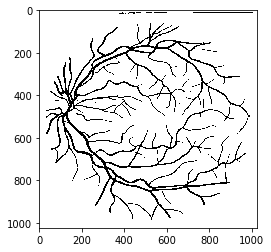

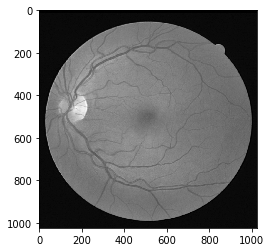

In [18]:
figure(1)
imshow(o_1[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_1,cmap = 'gray')
figure(2)
imshow(gray_img_1,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

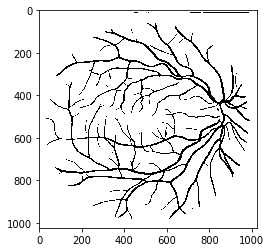

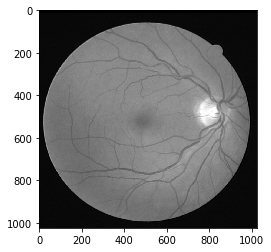

In [19]:
figure(1)
imshow(o_2[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_2,cmap = 'gray')
figure(2)
imshow(gray_img_2,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

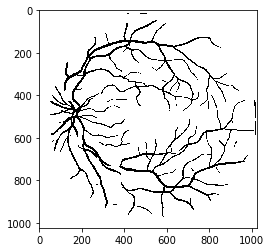

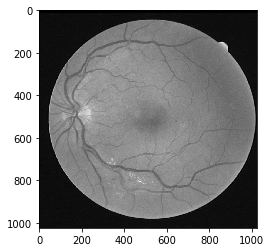

In [20]:
figure(1)
imshow(o_3[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_3,cmap = 'gray')
figure(2)
imshow(gray_img_3,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

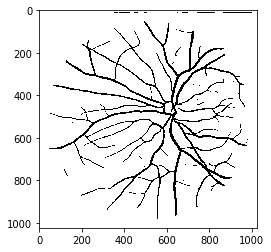

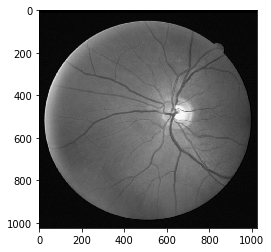

In [21]:
figure(1)
imshow(o_4[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_4,cmap = 'gray')
figure(2)
imshow(gray_img_4,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

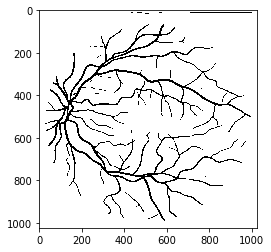

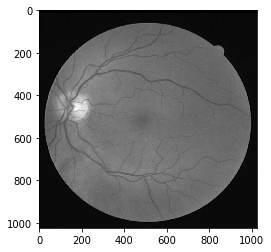

In [22]:
figure(1)
imshow(o_5[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_5,cmap = 'gray')
figure(2)
imshow(gray_img_5,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

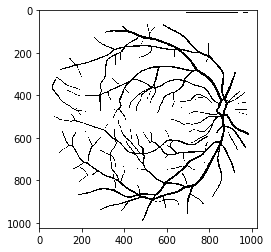

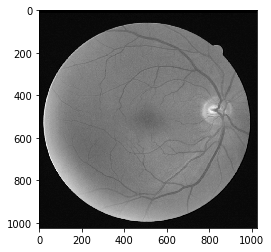

In [23]:
figure(1)
imshow(o_6[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_6,cmap = 'gray')
figure(2)
imshow(gray_img_6,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

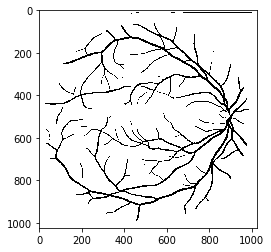

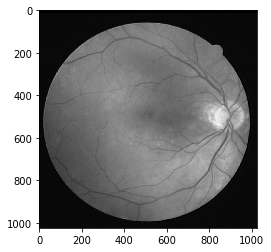

In [24]:
figure(1)
imshow(o_7[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_7,cmap = 'gray')
figure(2)
imshow(gray_img_7,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

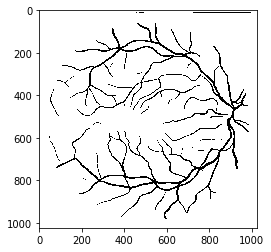

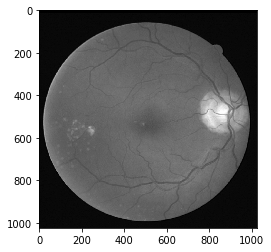

In [25]:
figure(1)
imshow(o_8[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_8,cmap = 'gray')
figure(2)
imshow(gray_img_8,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

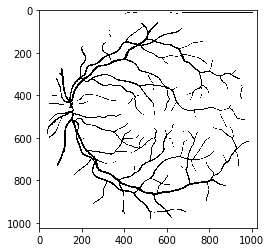

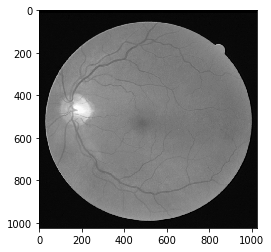

In [26]:
figure(1)
imshow(o_9[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_9,cmap = 'gray')
figure(2)
imshow(gray_img_9,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

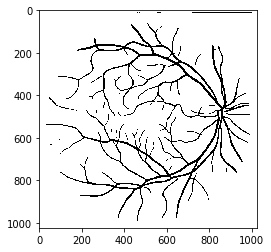

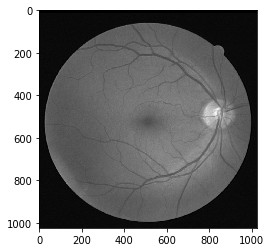

In [27]:
figure(1)
imshow(o_10[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_10,cmap = 'gray')
figure(2)
imshow(gray_img_10,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

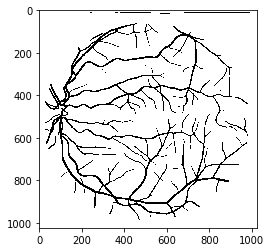

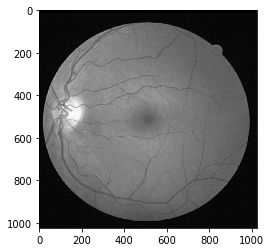

In [28]:
figure(1)
imshow(o_11[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_11,cmap = 'gray')
figure(2)
imshow(gray_img_11,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

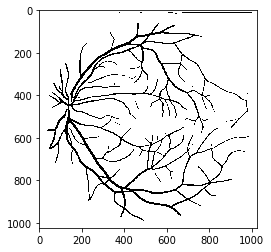

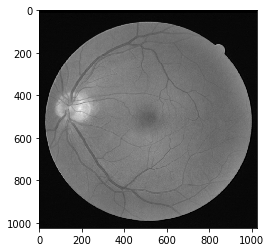

In [29]:
figure(1)
imshow(o_12[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_12,cmap = 'gray')
figure(2)
imshow(gray_img_12,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

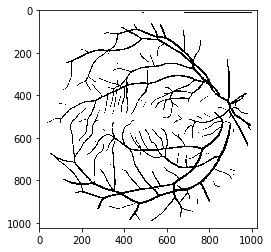

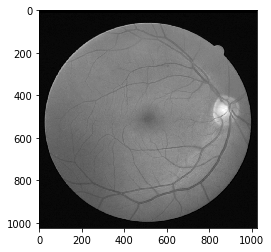

In [30]:
figure(1)
imshow(o_13[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_13,cmap = 'gray')
figure(2)
imshow(gray_img_13,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

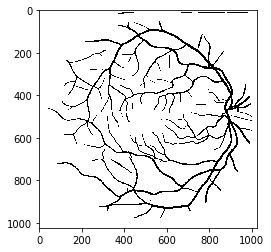

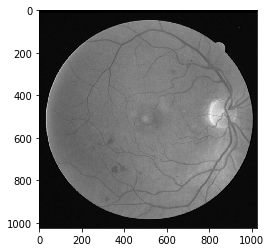

In [31]:
figure(1)
imshow(o_14[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_14,cmap = 'gray')
figure(2)
imshow(gray_img_14,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

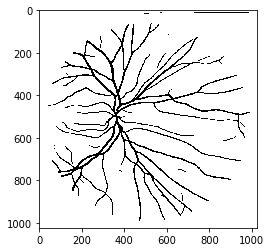

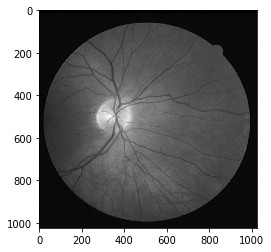

In [32]:
figure(1)
imshow(o_15[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_15,cmap = 'gray')
figure(2)
imshow(gray_img_15,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

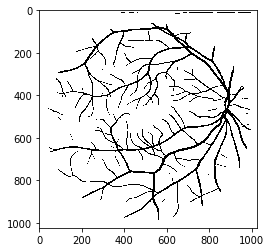

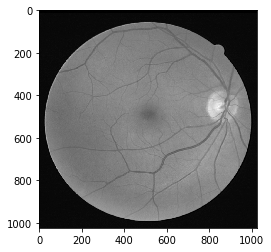

In [33]:
figure(1)
imshow(o_16[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_16,cmap = 'gray')
figure(2)
imshow(gray_img_16,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

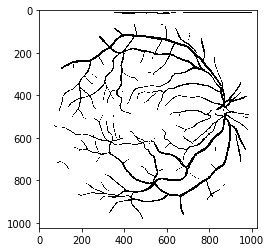

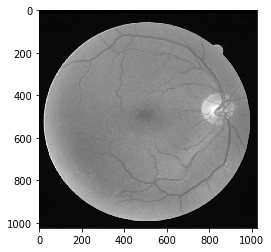

In [34]:
figure(1)
imshow(o_17[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_17,cmap = 'gray')
figure(2)
imshow(gray_img_17,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

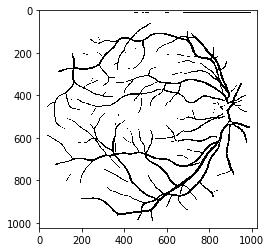

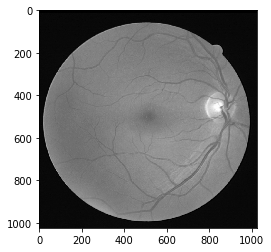

In [35]:
figure(1)
imshow(o_18[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_18,cmap = 'gray')
figure(2)
imshow(gray_img_18,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

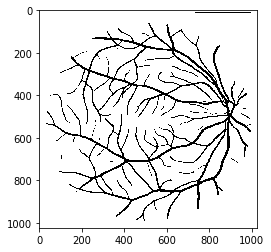

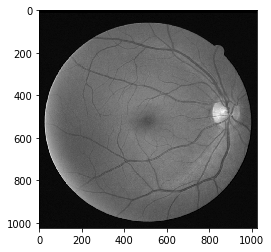

In [36]:
figure(1)
imshow(o_19[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_19,cmap = 'gray')
figure(2)
imshow(gray_img_19,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

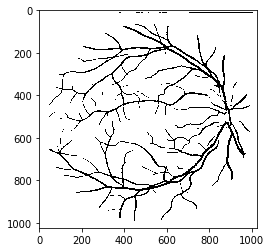

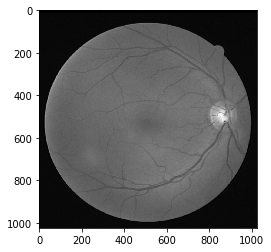

In [37]:
figure(1)
imshow(o_20[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_20,cmap = 'gray')

In [ ]:
# import cv2

In [ ]:
# from keras.models import load_model
# model = load_model('./final_model_2475.h5')

In [ ]:
# %pylab inline

In [ ]:
# in_path = '../data/2472.png'
# #label_path = './../data/labels/1.jpg'

In [ ]:
# img = imread(in_path)
# #label = imread(label_path)

In [ ]:
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
# np.unique(gray)

In [ ]:
# norm_img = (gray)-0.5

In [ ]:
# norm_img.shape

In [ ]:
# norm_img=norm_img.reshape((1,)+norm_img.shape+(1,))

In [ ]:
# norm_img.shape

In [ ]:
# out = model.predict(norm_img)


In [ ]:
# np.unique(out)

In [ ]:
# imshow(out[0,:,:,0],cmap='gray')

In [ ]:
# out[out<0.5]=0
# out[out>=0.5]=1

In [ ]:
# imshow(out[0,:,:,0],cmap='gray')

# Original Test Image

In [ ]:
# imshow(img,cmap = 'gray')

# Original Label of Test Image

In [ ]:
# imshow(label,cmap='gray')

# Segmented Output

In [ ]:
# imshow(out[0,:,:,0],cmap='gray')

In [ ]:
# out [out <= 0.55]= 0
# out [out > 0.55] = 1

### Left( Segmented Output after threshold of 0.5)     Right(Original Label of Test Image)    

In [ ]:
# subplot(121)
# imshow(out[0,:,:,0],cmap='gray')
# subplot(122)
# imshow(label,cmap='gray')